In [50]:
import pymongo
import matplotlib.pyplot as plt
import numpy as np
from pymongo import MongoClient
import pandas as pd


In [122]:
client = MongoClient("127.0.0.1",27017)
database = client.Prueba2
collection1 = database["peliculas"]
df = pd.DataFrame(list(collection1.find())) 
df = df.round(2)
df

,_id,,Moive Name,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director
0,65b91229d72b546d1c12fad5,0,Leave the World Behind,6.5,90000.0,67,"Drama, Mystery, Thriller",R,2023,2h 18m,"Julia Roberts, Mahershala Ali, Ethan Hawke, My...",Sam Esmail
1,65b91229d72b546d1c12fad6,1,Wonka,7.4,24000.0,66,"Adventure, Comedy, Family",PG,2023,1h 56m,"Timothée Chalamet, Gustave Die, Murray McArthu...",Paul King
2,65b91229d72b546d1c12fad7,2,Poor Things,8.5,6700.0,86,"Comedy, Drama, Romance",R,2023,2h 21m,"Emma Stone, Mark Ruffalo, Willem Dafoe, Ramy Y...",Yorgos Lanthimos
3,65b91229d72b546d1c12fad8,3,Killers of the Flower Moon,7.8,128000.0,89,"Crime, Drama, History",R,2023,3h 26m,"Leonardo DiCaprio, Robert De Niro, Lily Gladst...",Martin Scorsese
4,65b91229d72b546d1c12fad9,4,May December,7.0,21000.0,85,"Comedy, Drama",R,2023,1h 57m,"Natalie Portman, Chris Tenzis, Charles Melton,...",Todd Haynes
...,...,...,...,...,...,...,...,...,...,...,...,...
1945,65b91229d72b546d1c13026e,1945,"Definitely, Maybe",7.1,172000.0,59,"Comedy, Drama, Romance",PG-13,2008,1h 52m,"Ryan Reynolds, Rachel Weisz, Abigail Breslin, ...",Adam Brooks
1946,65b91229d72b546d1c13026f,1946,The Fly,7.6,198000.0,79,"Drama, Horror, Sci-Fi",R,1986,1h 36m,"Jeff Goldblum, Geena Davis, John Getz, Joy Bou...",David Cronenberg
1947,65b91229d72b546d1c130270,1947,The Mighty Ducks,6.5,71000.0,46,"Comedy, Drama, Family",PG,1992,1h 44m,"Emilio Estevez, Joss Ackland, Lane Smith, Heid...",Stephen Herek
1948,65b91229d72b546d1c130271,1948,Little Giants,6.4,30000.0,NA,NA,PG,1994,1h 47m,NA,NA


In [57]:
#Verificamos los datos
df.isnull().sum()

_id           0
              0
Moive Name    0
Rating        0
Votes         0
Meta Score    0
Genre         0
PG Rating     0
Year          0
Duration      0
Cast          0
Director      0
dtype: int64

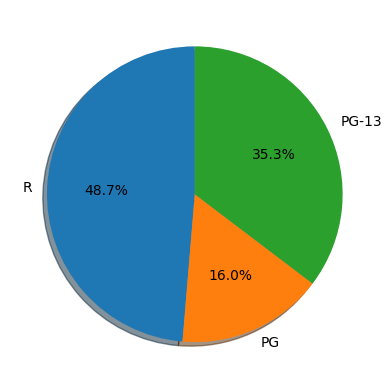

In [42]:
#Grafico 1
peliculasR =len(df[df["PG Rating"]=="R"])
peliculasPG =len(df[df["PG Rating"]=="PG"])
peliculasPG13 =len(df[df["PG Rating"]=="PG-13"])
total = 1950

labels = 'R', 'PG', 'PG-13'
sizes = [peliculasR/total, peliculasPG/total, peliculasPG13/total]
explode = (0, 0, 0) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

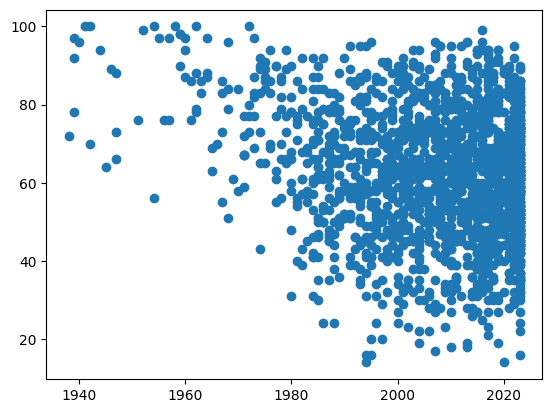

In [93]:
#Grafico 2

Y = df[df["Meta Score"]!="NA"]
X = Y["Year"]
Y = Y["Meta Score"]
plt.scatter(X,Y)


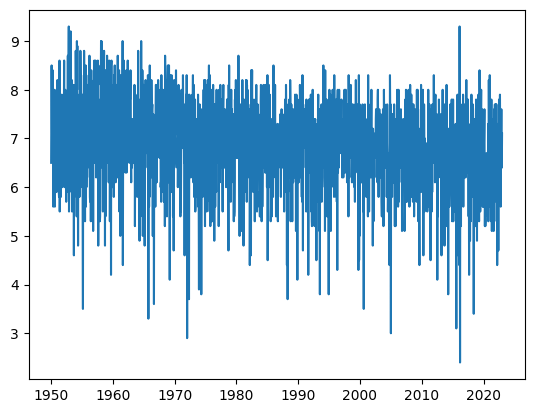

In [101]:
#Grafico 3
rating = np.linspace(1950, 2023, 1944, endpoint=True)
plt.plot(rating, df[df["Rating"]!="NA"]["Rating"].astype(float))
plt.show()

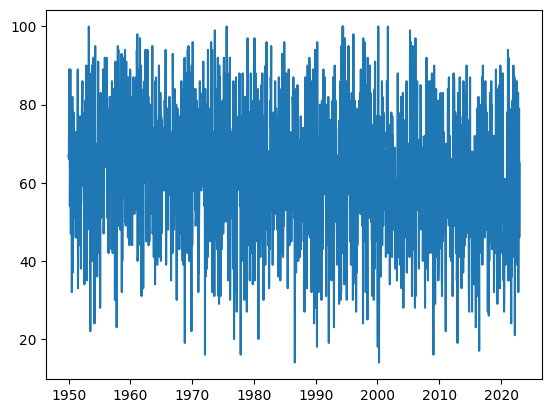

In [127]:
#Grafico 4

rating = np.linspace(1950, 2023, 1833, endpoint=True)
plt.plot(rating, df[df["Meta Score"]!="NA"]["Meta Score"].astype(float))
plt.show()


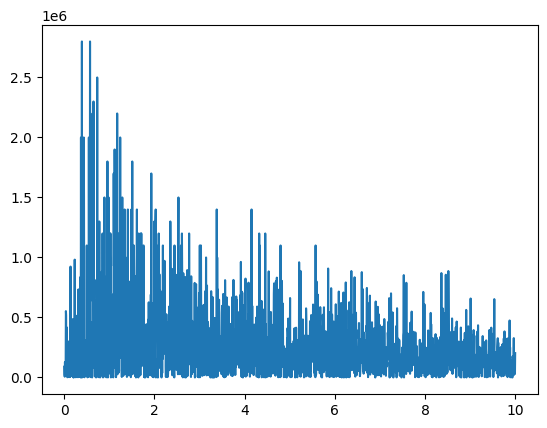

In [104]:
#grafico 5
rating = np.linspace(0, 10, 1944, endpoint=True)
plt.plot(rating, df[df["Rating"]!="NA"]["Votes"].astype(float))
plt.show()

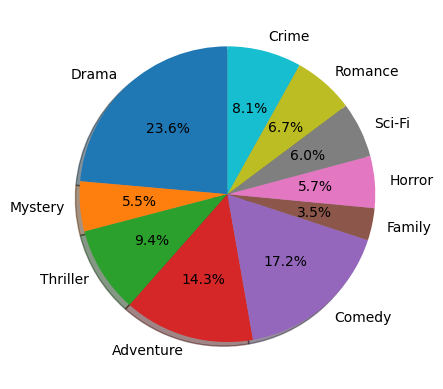

In [130]:
#Grafico 6
peliculasDrama =len(df[df['Genre'].str.contains("Drama")])
peliculasMystery =len(df[df['Genre'].str.contains("Mystery")])
peliculasThriller =len(df[df['Genre'].str.contains("Thriller")])
peliculasAdventure =len(df[df['Genre'].str.contains("Adventure")])
peliculasComedy =len(df[df['Genre'].str.contains("Comedy")])
peliculasFamily =len(df[df['Genre'].str.contains("Family")])
peliculasHorror =len(df[df['Genre'].str.contains("Horror")])
peliculasSci =len(df[df['Genre'].str.contains("Sci-Fi")])
peliculasRomance =len(df[df['Genre'].str.contains("Romance")])
peliculasCrime =len(df[df['Genre'].str.contains("Crime")])
total = peliculasDrama+peliculasMystery+peliculasThriller+peliculasAdventure+peliculasComedy+peliculasFamily+peliculasHorror+peliculasSci+peliculasRomance+peliculasCrime

labels = 'Drama', 'Mystery', 'Thriller',"Adventure","Comedy","Family","Horror","Sci-Fi","Romance","Crime"
sizes = [peliculasDrama/total, peliculasMystery/total, peliculasThriller/total,peliculasAdventure/total,peliculasComedy/total,peliculasFamily/total,peliculasHorror/total,peliculasSci/total,peliculasRomance/total,peliculasCrime/total]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

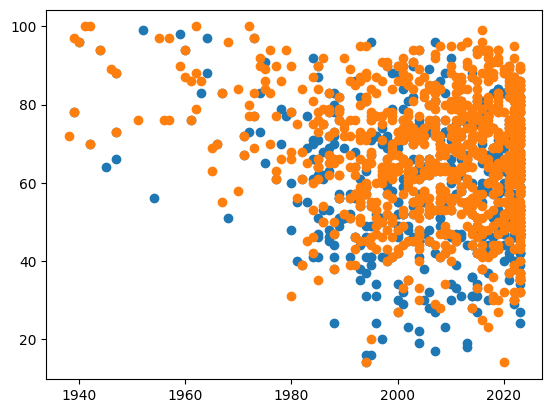

In [138]:
#Grafico 7

Y = df[df['Genre'].str.contains("Drama")]
X = Y["Year"]
Y = Y["Meta Score"]
F = df[df['Genre'].str.contains("Comedy")]
S = F["Year"]
F = F["Meta Score"]
plt.scatter(S,F)
plt.scatter(X,Y)

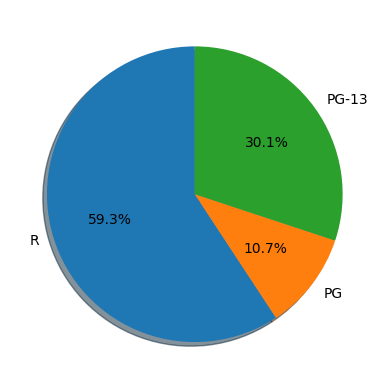

In [141]:
#Grafico 1
drama=df[df['Genre'].str.contains("Drama")]
peliculasR =len(drama[drama["PG Rating"]=="R"])
peliculasPG =len(drama[drama["PG Rating"]=="PG"])
peliculasPG13 =len(drama[drama["PG Rating"]=="PG-13"])
total = 1950

labels = 'R', 'PG', 'PG-13'
sizes = [peliculasR/total, peliculasPG/total, peliculasPG13/total]
explode = (0, 0, 0) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

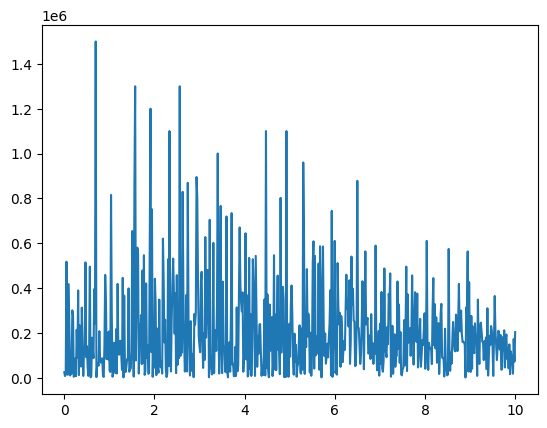

In [147]:
#grafico 9
comedy=df[df['Genre'].str.contains("Comedy")]
rating = np.linspace(0, 10, 618, endpoint=True)
plt.plot(rating, comedy[comedy["Rating"]!="NA"]["Votes"].astype(float))
plt.show()

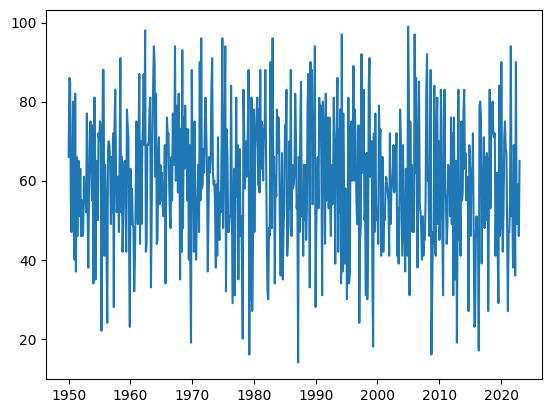

In [149]:
#grafico 10
rating = np.linspace(1950, 2023, 620, endpoint=True)
plt.plot(rating, comedy[comedy["Meta Score"]!="NA"]["Meta Score"].astype(float))
plt.show()